<a href="https://colab.research.google.com/github/ilinaa/VNP/blob/master/VNP_Seminarska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yesg
!pip install yfinance
!pip install tsfresh
!pip install pmdarima

!pip install catboost

  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6105 sha256=5f54010ac3a71bb9c3b7a7d2d64d1be9b6e516fc212c6b7a4a244044447df130
  Stored in directory: /root/.cache/pip/wheels/2b/53/0e/129a8d67d809bf89a196f3ea3e56b9df3da4975924157cb1a3
Successfully built yesg
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


In [2]:
import yfinance
import yesg
from tsfresh import extract_features
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
#import plotly.graph_objects as pg
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import precision_score
import keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
import os
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.impute import SimpleImputer
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from math import sqrt

# Обработка на цените на акции за компанијата ADIDAS

In [3]:
ticker = 'ADS.DE'

In [4]:

adidas_data = yfinance.download(ticker, start='2020-01-01', end=datetime.today().strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [5]:
adidas_data = adidas_data.reset_index()

In [6]:
adidas_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,289.200012,293.250000,289.200012,291.549988,281.179169,429314
1,2020-01-03,290.000000,292.250000,288.350006,291.950012,281.564972,440067
2,2020-01-06,288.950012,290.649994,285.149994,289.649994,279.346741,494435
3,2020-01-07,290.549988,296.500000,290.500000,294.750000,284.265350,489629
4,2020-01-08,294.000000,302.850006,293.500000,302.850006,292.077240,686646
...,...,...,...,...,...,...,...
1149,2024-07-03,216.500000,220.399994,215.199997,218.100006,218.100006,348200
1150,2024-07-04,218.199997,219.500000,216.699997,219.500000,219.500000,196939
1151,2024-07-05,219.899994,223.100006,218.800003,220.300003,220.300003,295332
1152,2024-07-08,220.300003,222.699997,218.699997,218.800003,218.800003,272629


In [7]:
adidas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1154 non-null   datetime64[ns]
 1   Open       1154 non-null   float64       
 2   High       1154 non-null   float64       
 3   Low        1154 non-null   float64       
 4   Close      1154 non-null   float64       
 5   Adj Close  1154 non-null   float64       
 6   Volume     1154 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 63.2 KB


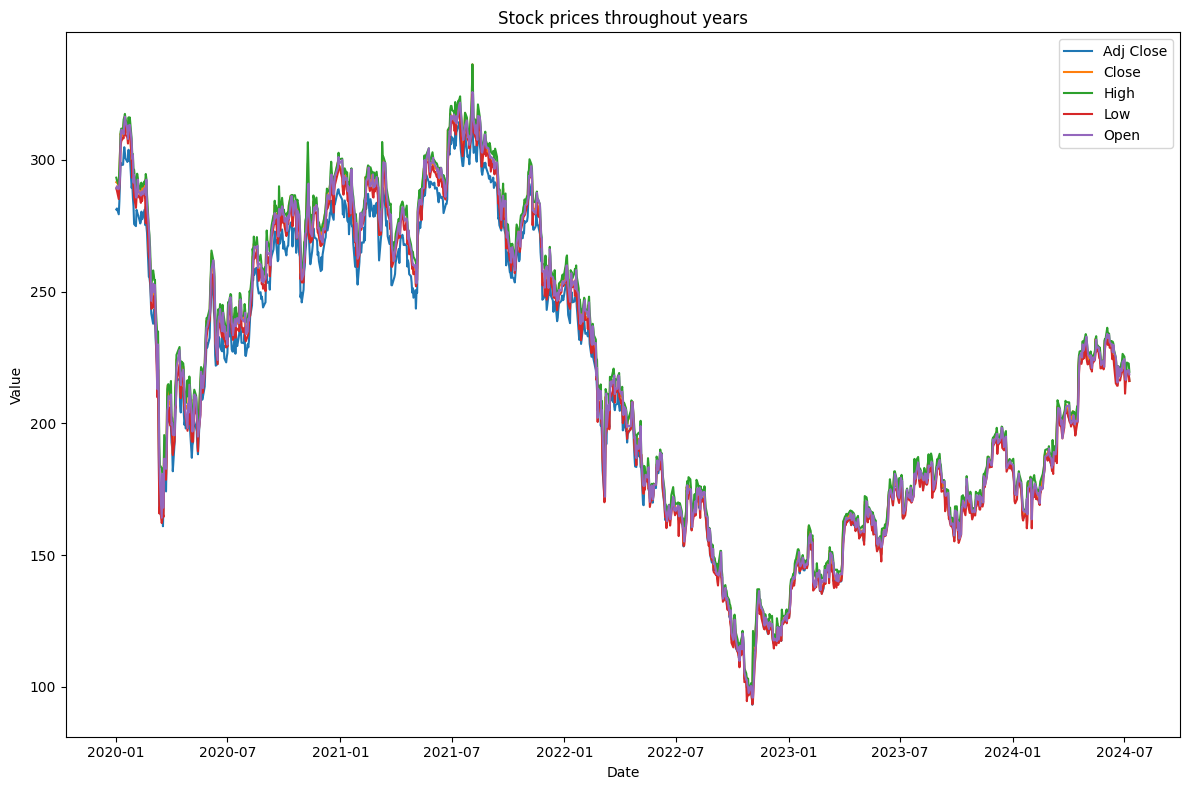

In [8]:
columns = ["Adj Close", "Close", "High","Low","Open"]

plt.figure(figsize=(12, 8))
for column in columns:
    plt.plot(adidas_data['Date'], adidas_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock prices throughout years')
plt.legend()
plt.tight_layout()
plt.show()


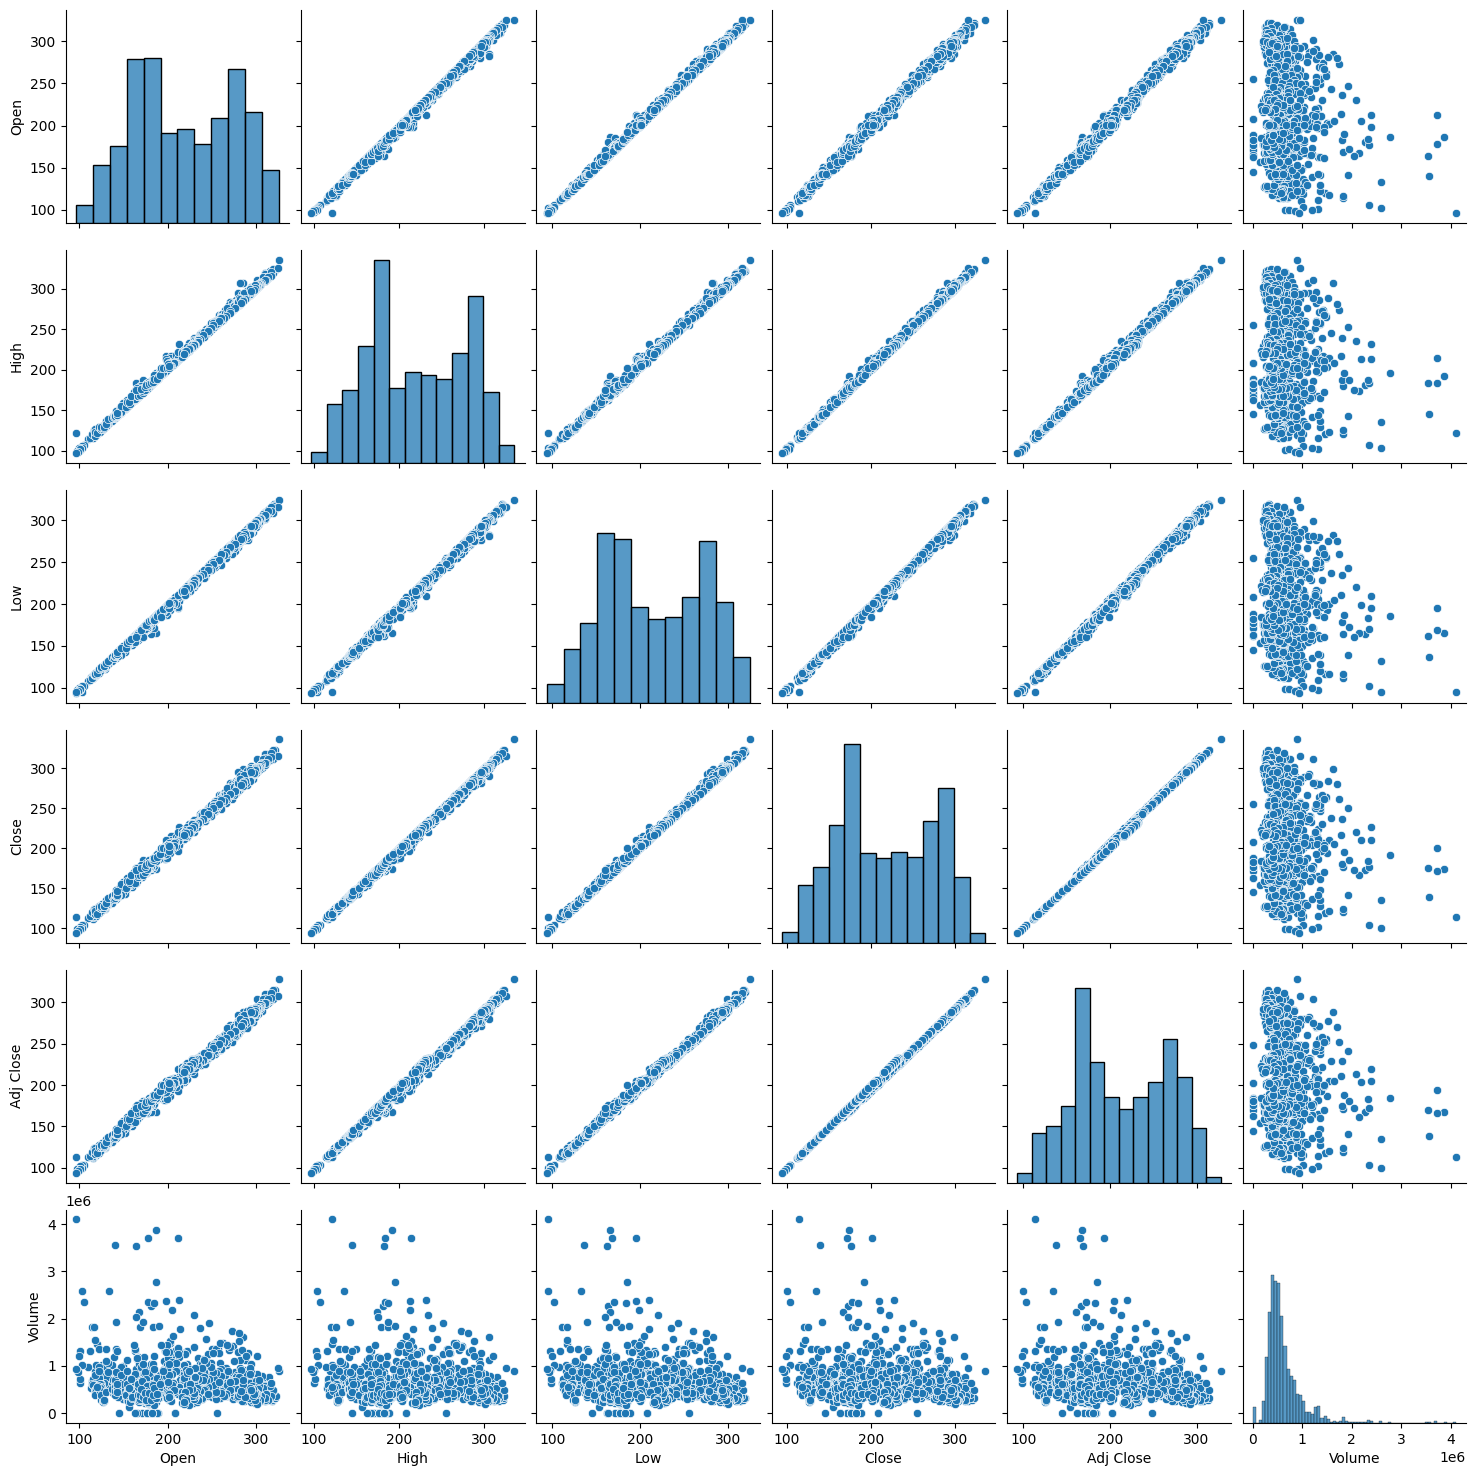

In [9]:
sns.pairplot(adidas_data[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']])
plt.show()

In [10]:
adidas_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Користење на tsfresh за анализа на цените на акциите на компанијата ADIDAS**

In [11]:
exc_close = extract_features(adidas_data, column_id='Close',column_sort='Date')
print(exc_close)

Feature Extraction: 100%|██████████| 4995/4995 [02:49<00:00, 29.45it/s]


            Open__variance_larger_than_standard_deviation  \
93.949997                                             0.0   
96.879997                                             0.0   
98.970001                                             0.0   
98.980003                                             0.0   
99.339996                                             0.0   
...                                                   ...   
321.100006                                            0.0   
321.200012                                            0.0   
322.700012                                            0.0   
322.750000                                            0.0   
336.250000                                            0.0   

            Open__has_duplicate_max  Open__has_duplicate_min  \
93.949997                       0.0                      0.0   
96.879997                       0.0                      0.0   
98.970001                       0.0                      0.0   
98.980003  

# Обработка на ESG score на компанијата ADIDAS

In [12]:
import requests

url = 'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=ads.de'

def get_yahoo_cookie():
    cookie = None

    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"

    headers = {user_agent_key: user_agent_value}
    response = requests.get(
        "https://fc.yahoo.com", headers=headers, allow_redirects=True
    )

    if not response.cookies:
        raise Exception("Failed to obtain Yahoo auth cookie.")

    cookie = list(response.cookies)[0]

    return cookie


def get_yahoo_crumb(cookie):
    crumb = None
    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"

    headers = {user_agent_key: user_agent_value}

    crumb_response = requests.get(
        "https://query1.finance.yahoo.com/v1/test/getcrumb",
        headers=headers,
        cookies={cookie.name: cookie.value},
        allow_redirects=True,
    )
    crumb = crumb_response.text

    if crumb is None:
        raise Exception("Failed to retrieve Yahoo crumb.")

    return crumb


cookie = get_yahoo_cookie()
crumb = get_yahoo_crumb(cookie)


In [13]:
headers = {
    "User-Agent": "Your User Agent",
    "Crumb": crumb
}

headers = {
    "User-Agent": "Your User Agent",
    "Crumb": crumb,
    "Cookie": f"A3={cookie}"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("Data received:", data)
else:
    print("Request failed with status code:", response.status_code)

Data received: {'esgChart': {'result': [{'peerGroup': 'Textiles & Apparel', 'symbolSeries': {'timestamp': [1409529600, 1412121600, 1414800000, 1417392000, 1420070400, 1422748800, 1425168000, 1427846400, 1430438400, 1433116800, 1435708800, 1438387200, 1441065600, 1443657600, 1446336000, 1448928000, 1451606400, 1454284800, 1456790400, 1459468800, 1462060800, 1464739200, 1467331200, 1470009600, 1472688000, 1475280000, 1477958400, 1480550400, 1483228800, 1485907200, 1488326400, 1491004800, 1493596800, 1496275200, 1498867200, 1501545600, 1504224000, 1506816000, 1509494400, 1512086400, 1514764800, 1517443200, 1519862400, 1522540800, 1525132800, 1527811200, 1530403200, 1533081600, 1535760000, 1538352000, 1541030400, 1543622400, 1546300800, 1548979200, 1551398400, 1554076800, 1556668800, 1559347200, 1561939200, 1564617600, 1567296000, 1569888000, 1572566400, 1575158400, 1577836800, 1580515200, 1583020800, 1585699200, 1588291200, 1590969600, 1593561600, 1596240000, 1598918400, 1601510400, 16041

In [14]:
print(response.json())

{'esgChart': {'result': [{'peerGroup': 'Textiles & Apparel', 'symbolSeries': {'timestamp': [1409529600, 1412121600, 1414800000, 1417392000, 1420070400, 1422748800, 1425168000, 1427846400, 1430438400, 1433116800, 1435708800, 1438387200, 1441065600, 1443657600, 1446336000, 1448928000, 1451606400, 1454284800, 1456790400, 1459468800, 1462060800, 1464739200, 1467331200, 1470009600, 1472688000, 1475280000, 1477958400, 1480550400, 1483228800, 1485907200, 1488326400, 1491004800, 1493596800, 1496275200, 1498867200, 1501545600, 1504224000, 1506816000, 1509494400, 1512086400, 1514764800, 1517443200, 1519862400, 1522540800, 1525132800, 1527811200, 1530403200, 1533081600, 1535760000, 1538352000, 1541030400, 1543622400, 1546300800, 1548979200, 1551398400, 1554076800, 1556668800, 1559347200, 1561939200, 1564617600, 1567296000, 1569888000, 1572566400, 1575158400, 1577836800, 1580515200, 1583020800, 1585699200, 1588291200, 1590969600, 1593561600, 1596240000, 1598918400, 1601510400, 1604188800, 16067808

In [15]:
base = response.json()["esgChart"]["result"][0]["symbolSeries"]

timestamps = base["timestamp"]
esg = base["esgScore"]
gscore = base["governanceScore"]
escore = base["environmentScore"]
sscore = base["socialScore"]

In [16]:

dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

In [17]:
print(esg)
print(gscore)
print(escore)
print(sscore)

[77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 75.56, 75.56, 75.56, 76.54, 76.54, 76.54, 75.69, 78.47, 79.97, 79.97, 79.97, 79.12, 78.12, 78.12, 78.12, 78.12, 78.37, 78.37, 78.37, 79.92, 79.92, 78.89, 78.89, 78.89, 78.89, 78.89, 78.89, 78.89, 78.89, 76.76, 78.43, 76.06, 76.06, 76.06, 75.96, 75.22, 75.22, 75.22, 74.81, 74.81, 73.61, 73.61, 73.61, 73.61, 73.57, 73.57, 73.74, 72.7, 13.45, 13.45, 13.76, None, None, None, 13.88, 13.88, None, 13.88, None, None, 13.88, 13.88, 13.88, None, 13.88, None, None, None, None, None, None, None, None, 13.42, None, None, 13.42, None, None, 13.46, None, None, None, None, None, None, None, None, None, None, None, None, 14.83]
[68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.25, 68.25, 68.25, 68.25, 68.25, 68.25, 68.25, 74.8, 74.8, 74.8, 74.8, 71.4, 71.4, 71.4, 71.4, 71.4, 71.4, 71.4, 71.4, 76.4, 76.4, 71.3, 71.3, 71.3, 71.3, 71.3, 71.3, 71.3, 71.3, 73.3, 

In [18]:

df_esg = pd.DataFrame(list(zip(dates,esg,gscore,escore,sscore)), columns=['Date', 'ESG',"G-Score","E-Score","S-Score"])

In [19]:
df_esg.head()

,Date,ESG,G-Score,E-Score,S-Score
0,2014-09-01 00:00:00,77.0,68.0,80.0,80.0
1,2014-10-01 00:00:00,77.0,68.0,80.0,80.0
2,2014-11-01 00:00:00,77.0,68.0,80.0,80.0
3,2014-12-01 00:00:00,77.0,68.0,80.0,80.0
4,2015-01-01 00:00:00,77.0,68.0,80.0,80.0


In [20]:
df_esg['Date'] = pd.to_datetime(df_esg['Date'])
start_date = pd.to_datetime('2019-09-01')
end_date = pd.to_datetime(pd.Timestamp.now().date())
df_esg = df_esg[(df_esg['Date'] >= start_date) & (df_esg['Date'] <= end_date)]

In [21]:
df_esg

,Date,ESG,G-Score,E-Score,S-Score
60,2019-09-01,73.57,68.20,79.81,71.46
61,2019-10-01,73.57,68.20,79.81,71.46
62,2019-11-01,73.74,68.90,79.81,71.46
63,2019-12-01,72.70,69.90,78.04,69.77
64,2020-01-01,13.45,7.16,2.18,4.11
65,2020-02-01,13.45,7.16,2.18,4.11
66,2020-03-01,13.76,7.18,2.18,4.40
67,2020-04-01,NaN,NaN,NaN,NaN
68,2020-05-01,NaN,NaN,NaN,NaN
69,2020-06-01,NaN,NaN,NaN,NaN


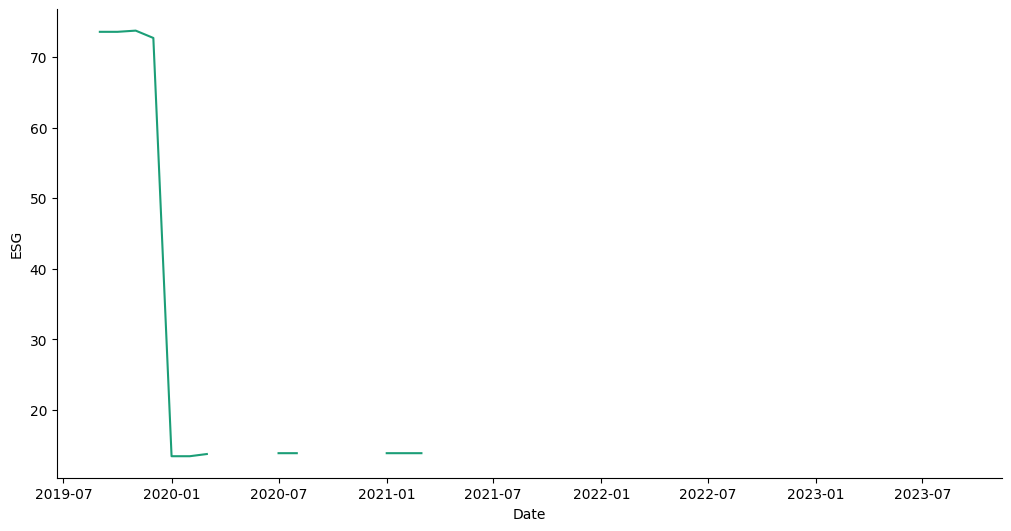

In [22]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['ESG']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_esg.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('ESG')

In [23]:
df_esg.shape

(49, 5)

In [24]:
df_esg.isnull().sum()


Date        0
ESG        31
G-Score    31
E-Score    31
S-Score    31
dtype: int64

In [25]:
df_esg_copy = df_esg.copy()
df_esg_copy['Date'] = pd.to_datetime(df_esg_copy['Date'])
df_esg_copy.set_index('Date', inplace=True)

In [69]:
esg_filled = df_esg_copy.ffill(axis = 0)

In [71]:
esg_filled.isnull().sum()

ESG        0
G-Score    0
E-Score    0
S-Score    0
dtype: int64

In [72]:
esg_filled

,ESG,G-Score,E-Score,S-Score
Date,,,,
2019-09-01,73.57,68.20,79.81,71.46
2019-10-01,73.57,68.20,79.81,71.46
2019-11-01,73.74,68.90,79.81,71.46
2019-12-01,72.70,69.90,78.04,69.77
2020-01-01,13.45,7.16,2.18,4.11
2020-02-01,13.45,7.16,2.18,4.11
2020-03-01,13.76,7.18,2.18,4.40
2020-04-01,13.76,7.18,2.18,4.40
2020-05-01,13.76,7.18,2.18,4.40


In [73]:
esg_filled.reset_index(inplace=True)

In [74]:
esg_filled.isnull().sum()

Date       0
ESG        0
G-Score    0
E-Score    0
S-Score    0
dtype: int64

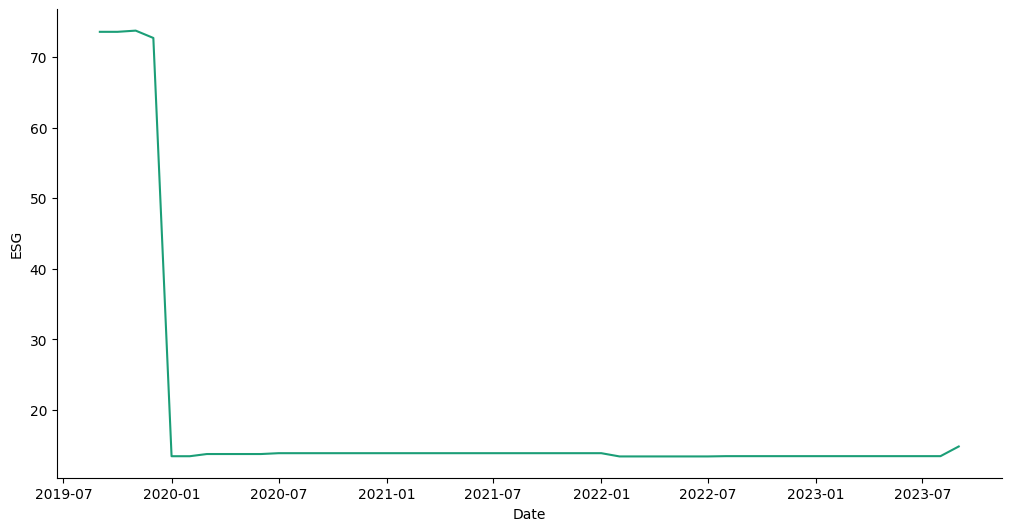

In [75]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['ESG']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = esg_filled.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('ESG')

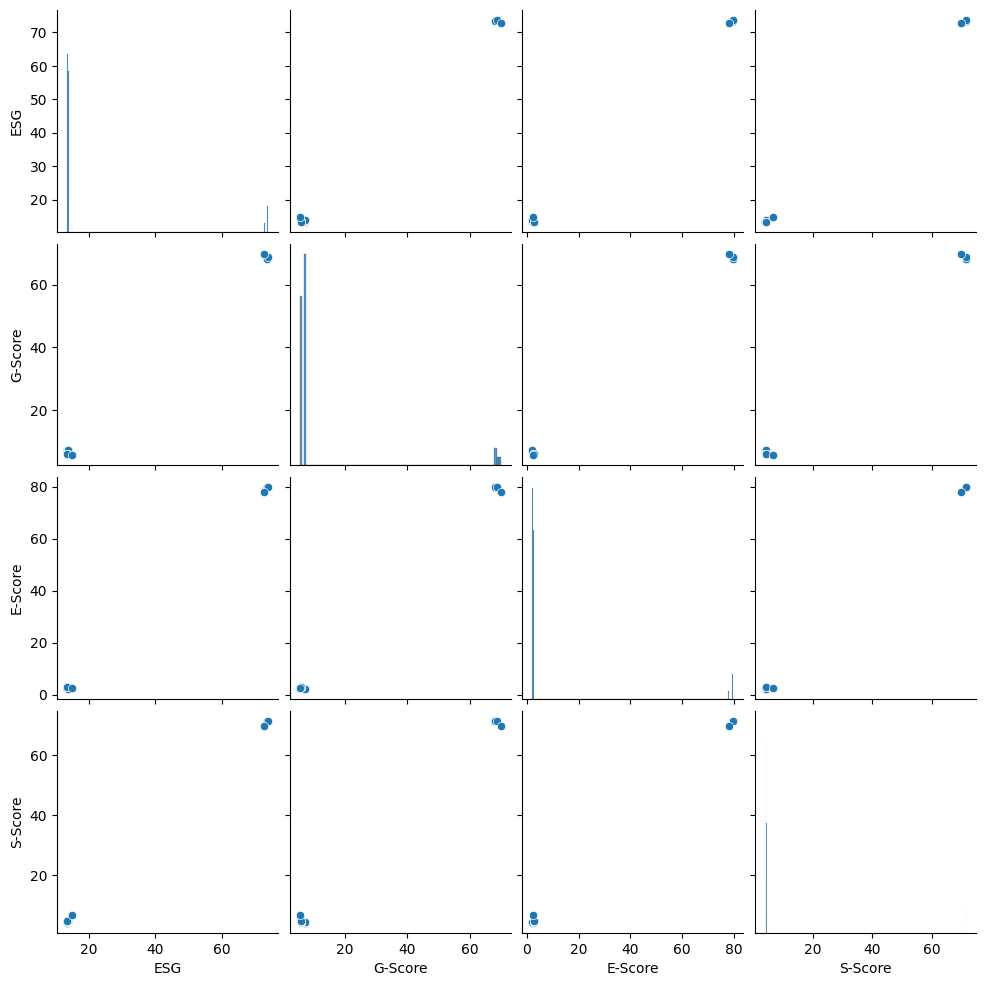

In [76]:
sns.pairplot(esg_filled[['ESG',	'G-Score',	'E-Score',	'S-Score']])
plt.show()

In [77]:
exc_esg = extract_features(esg_filled, column_id='ESG', column_sort='Date')
print(exc_esg)

Feature Extraction: 100%|██████████| 27/27 [00:01<00:00, 15.85it/s]


       G-Score__variance_larger_than_standard_deviation  \
13.42                                               0.0   
13.45                                               0.0   
13.46                                               0.0   
13.76                                               0.0   
13.88                                               0.0   
14.83                                               0.0   
72.70                                               0.0   
73.57                                               0.0   
73.74                                               0.0   

       G-Score__has_duplicate_max  G-Score__has_duplicate_min  \
13.42                         1.0                         1.0   
13.45                         1.0                         1.0   
13.46                         1.0                         1.0   
13.76                         1.0                         1.0   
13.88                         1.0                         1.0   
14.83              

In [34]:
print(exc_esg.describe())

       G-Score__variance_larger_than_standard_deviation  \
count                                               9.0   
mean                                                0.0   
std                                                 0.0   
min                                                 0.0   
25%                                                 0.0   
50%                                                 0.0   
75%                                                 0.0   
max                                                 0.0   

       G-Score__has_duplicate_max  G-Score__has_duplicate_min  \
count                    9.000000                    9.000000   
mean                     0.666667                    0.666667   
std                      0.500000                    0.500000   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      1.000000                    1.000000   
75%          

# **Предикција на ESG Score на компанијата ADIDAS**

 **Random Forest**

In [78]:
data_1 = esg_filled.set_index("Date")

In [79]:
data_1

,ESG,G-Score,E-Score,S-Score
Date,,,,
2019-09-01,73.57,68.20,79.81,71.46
2019-10-01,73.57,68.20,79.81,71.46
2019-11-01,73.74,68.90,79.81,71.46
2019-12-01,72.70,69.90,78.04,69.77
2020-01-01,13.45,7.16,2.18,4.11
2020-02-01,13.45,7.16,2.18,4.11
2020-03-01,13.76,7.18,2.18,4.40
2020-04-01,13.76,7.18,2.18,4.40
2020-05-01,13.76,7.18,2.18,4.40


In [85]:
X,Y = data_1,data_1['ESG']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [87]:
regressor = RandomForestRegressor(n_estimators=100,random_state=1)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [88]:
preds = regressor.predict(X_test)

In [89]:
mse = mean_squared_error(Y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, preds)
r2 = r2_score(Y_test, preds)
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)
print('R2 SCORE', r2)

MSE 0.740127913000044
RMSE 0.8603068714127791
MAE 0.37295000000002554
R2 SCORE 0.997692956852305


**XGboost**

In [90]:
data_2 = esg_filled.set_index('Date')

In [91]:
X = data_2.copy()
Y = X['ESG']

In [92]:
params = {
    "n_estimators": np.arange(20, 100, 10),
    "max_depth": [3, 5, 7]
}

In [93]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(3), param_grid=params)

In [94]:
grid_search.fit(X, Y, verbose=3)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([20, 30, 40, 50, 60, 70, 80, 90])})

In [95]:
estimator = grid_search.best_estimator_
estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [97]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
preds = estimator.predict(X_test)

In [99]:
mse = mean_squared_error(Y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, preds)
r2 = r2_score(Y_test, preds)
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)
print('R2 SCORE', r2)

MSE 0.09035021817233255
RMSE 0.30058313021913347
MAE 0.09514545822143479
R2 SCORE 0.46513329797755965


**CATBoost**

In [100]:
data_3 = esg_filled.set_index('Date')

In [101]:
X,Y = data_3, data_3['ESG']

In [102]:
from catboost import CatBoostRegressor

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [104]:
scaler=MinMaxScaler()

In [105]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE')


In [107]:
model.fit(X_train, Y_train)

0:	learn: 15.0688863	total: 211us	remaining: 20.9ms
1:	learn: 14.4859127	total: 351us	remaining: 17.2ms
2:	learn: 13.9262580	total: 457us	remaining: 14.8ms
3:	learn: 13.2059466	total: 580us	remaining: 13.9ms
4:	learn: 12.5158171	total: 663us	remaining: 12.6ms
5:	learn: 12.0442241	total: 770us	remaining: 12.1ms
6:	learn: 11.6016148	total: 891us	remaining: 11.8ms
7:	learn: 11.0078806	total: 1.02ms	remaining: 11.7ms
8:	learn: 10.4404671	total: 1.11ms	remaining: 11.2ms
9:	learn: 9.9080115	total: 1.23ms	remaining: 11.1ms
10:	learn: 9.5506301	total: 1.34ms	remaining: 10.9ms
11:	learn: 9.2947972	total: 1.48ms	remaining: 10.9ms
12:	learn: 8.9603094	total: 1.59ms	remaining: 10.6ms
13:	learn: 8.7237410	total: 2.06ms	remaining: 12.6ms
14:	learn: 8.2818333	total: 2.29ms	remaining: 13ms
15:	learn: 7.8639029	total: 2.56ms	remaining: 13.4ms
16:	learn: 7.4674124	total: 2.81ms	remaining: 13.7ms
17:	learn: 7.2056291	total: 2.95ms	remaining: 13.4ms
18:	learn: 6.8432244	total: 3.02ms	remaining: 12.9ms
19:

In [108]:
preds = model.predict(X_test)

In [109]:
mse = mean_squared_error(Y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, preds)
r2 = r2_score(Y_test, preds)
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)
print('R2 SCORE', r2)

MSE 0.6786401265164342
RMSE 0.823796168063699
MAE 0.41041220405331486
R2 SCORE 0.9978938861481552


**ARIMA**

In [110]:
data_4 = esg_filled.set_index('Date')

In [111]:
stepwise_fit = auto_arima(data_4['ESG'], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=361.294, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=416.892, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=356.218, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=382.570, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=455.468, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=357.944, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=357.977, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=359.328, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=356.358, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.714 seconds


In [112]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -175.109
Date:                Wed, 10 Jul 2024   AIC                            356.218
Time:                        09:10:16   BIC                            361.894
Sample:                    09-01-2019   HQIC                           358.372
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0143     28.072      0.072      0.943     -53.005      57.034
ar.L1          0.9260      0.614      1.508      0.132      -0.278       2.130
sigma2        71.4964     43.611      1.639      0.101     -13.980     156.973
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2711.03
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
X = data_4.copy()
Y = X['ESG']

train_test = int(0.8 * len(X))


train = X[:train_test]
test = X[train_test:]
print(train.shape,test.shape)

(39, 4) (10, 4)


In [114]:
model = ARIMA(train['ESG'], order=(1,0,5))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ESG   No. Observations:                   39
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -143.439
Date:                Wed, 10 Jul 2024   AIC                            302.878
Time:                        09:10:33   BIC                            316.187
Sample:                    09-01-2019   HQIC                           307.653
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7700     23.276      0.935      0.350     -23.850      67.390
ar.L1          0.5505      1.397      0.394      0.693      -2.187       3.288
ma.L1          0.4184      1.301      0.322      0.748      -2.131       2.968
ma.L2          0.3791      1.240      0.306      0.760      -2.052       2.810
ma.L3          0.3636      1.214      0.299      0.765      -2.017       2.744
ma.L4          0.1209      1.106      0.109      0.913      -2.048       2.289
ma.L5          0.0661      0.736      0.090      0.928      -1.377       1.509
sigma2        87.9949     29.530      2.980      0.003      30.118     145.872
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):               420.73
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
start = len(train)
end = len(train) + len(test) -1
preds = model.predict(start=start, end=end, typ = 'levels')
print(preds)

2022-12-01    15.052860
2023-01-01    16.594262
2023-02-01    18.044230
2023-03-01    19.421137
2023-04-01    20.371648
2023-05-01    21.000249
2023-06-01    21.346285
2023-07-01    21.536771
2023-08-01    21.641631
2023-09-01    21.699355
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [116]:
mse = mean_squared_error(Y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, preds)
r2 = r2_score(Y_test, preds)
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)
print('R2 SCORE', r2)

MSE 307.5718811772307
RMSE 17.537727366373066
MAE 10.383586134662872
R2 SCORE 0.045471415445941576
